In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv("~/Downloads/puzzle_anon.csv")
df.head(1)

,name,start odds,end odds
0,1718561694846000000,0.924528,0.154088


In [8]:
df.describe()

,name,start odds,end odds
count,1.750000e+02,175.000000,175.000000
mean,3.607165e+18,0.536980,0.201021
std,2.156337e+18,0.274386,0.207278
min,1.547484e+18,0.001080,0.000216
25%,1.693568e+18,0.326268,0.072973
50%,2.416068e+18,0.542165,0.140363
75%,6.228119e+18,0.762969,0.215483
max,7.002590e+18,0.995002,0.995002


In [12]:
df['odds_diff'] = df['start odds'] - df['end odds']

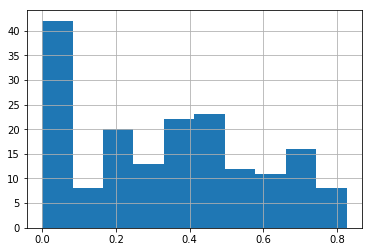

In [16]:
df['odds_diff'].hist()

In [17]:
len(df['name'].unique())

7

In [46]:
aggregated = df.groupby('name')\
    .agg({'odds_diff': ['mean', 'min', 'max']})
aggregated.columns = aggregated.columns.droplevel(0)
aggregated.sort_values('mean', ascending=False, inplace=True)
aggregated.reset_index(inplace=True)
aggregated

,name,mean,min,max
0,1718561694846000000,0.470443,0.000864,0.770795
1,2416068425895370000,0.465390,0.048074,0.825406
2,6228119144908420000,0.433950,0.067264,0.817015
3,7002589994262270000,0.398429,0.004640,0.760653
4,1547483661413490000,0.343895,0.011657,0.762550
5,1693568023468290000,0.130098,0.000000,0.493390
6,4643766977283540000,0.109509,0.000000,0.395543


In [27]:
# Q-1: Check the ids of all of the cheaters here.
"""everyone above 1693568023468290000"""

In [37]:
df_real = pd.read_csv("/Users/ivan.sobolev/Downloads/puzzle_real.csv")
df_real.head(1)

,name,start odds,end odds
0,hill,0.501586,0.501586


In [51]:
df_real['odds_diff'] = df_real['start odds'] - df_real['end odds']
df_real.head()

,name,start odds,end odds,odds_diff
0,hill,0.501586,0.501586,0.000000
1,bob,0.337860,0.056310,0.281550
2,john,0.013989,0.002331,0.011657
3,sally,0.530880,0.088480,0.442400
4,bob,0.323761,0.064752,0.259009


In [60]:
# Q-2: Match the numeric identifiers from the first part of the project with the real names.
df_real\
    .merge(df, on=['start odds', 'end odds'], how='left')\
    .groupby('name_x')\
    .aggregate({'name_y': ['min', 'max']})

name_y                     
                        min                  max
name_x                                          
bob     7002589994262270000  7002589994262270000
don     4643766977283540000  4643766977283540000
hill    1693568023468290000  1693568023468290000
jane    2416068425895370000  2416068425895370000
john    1547483661413490000  1547483661413490000
sally   6228119144908420000  6228119144908420000
sue     1718561694846000000  1718561694846000000

In [54]:
df_real.merge??